In [1]:
from __future__ import division

import tweepy # Helps in getting tweets 
from textblob import TextBlob # For getting tweet's subjectivity and polarity
from twython import Twython # Helps in getting tweets 
from wordcloud import WordCloud # Helps in forming a word cloud
import pandas as pd # Making and Manipulating a dataframe
import numpy as np # Helps in various vector and matrix calculations
import re # The Regex library
import matplotlib.pyplot as plt # For plotting various visualizations
from functools import reduce # An important method which will help in joining data frames
plt.style.use('fivethirtyeight')
import os # The os library to get current path and various other things
from PIL import Image # To get a mask for the word cloud



In [2]:
df1 = pd.read_csv('data1.csv') # Reading the first file
df1.drop(df1.columns[0],axis=1,inplace=True)

In [3]:
df2 = pd.read_csv('data2.csv')# Reading the second file
df2.drop(df2.columns[0],axis=1,inplace=True)

In [4]:
df3 = pd.read_csv('data3.csv')# Reading the third file
df3.drop(df3.columns[0],axis=1,inplace=True)

In [5]:
df4 = pd.read_csv('data4.csv')# Reading the fourth file
df4.drop(df4.columns[0],axis=1,inplace=True)

In [6]:
data_frames = [df1, df2, df3, df4] # Making a list of all dataframes
df1.head() # Checking the df

,tweet_id,tweets,tweet_text,Subjectivity,Polarity,Sentiment,location,retweets,response,date
0,1242694084235530241,{'created_at': 'Wed Mar 25 06:05:32 +0000 2020...,"Corona time - Good morning, suddenly I just wa...",0.550000,0.350000,Positive,Tel Aviv,0,NaN,2020-03-25
1,1242694694590541825,{'created_at': 'Wed Mar 25 06:07:57 +0000 2020...,Isolation gear and a SUV and no cops. Weird. I...,1.000000,-0.500000,Negative,"Portsmouth, RI",0,NaN,2020-03-25
2,1242694966297735169,{'created_at': 'Wed Mar 25 06:09:02 +0000 2020...,liveleak More Cooties than Corona?,0.500000,0.500000,Positive,"Warszawa, Polska",0,NaN,2020-03-25
3,1242695415037857793,{'created_at': 'Wed Mar 25 06:10:49 +0000 2020...,FIGHT DA VIRUS WITH DA GOAT TFITNES6 LAST PUSH...,0.066667,0.000000,Neutral,"Johannesburg, South Africa",0,NaN,2020-03-25
4,1242695498382934017,{'created_at': 'Wed Mar 25 06:11:09 +0000 2020...,Share it with your Loved Ones and Keep Social ...,0.288889,0.244444,Positive,"New York, NY",0,NaN,2020-03-25


In [10]:
df = reduce(lambda  left,right: pd.merge(left,right,on=['tweet_id','tweets','tweet_text','Subjectivity', 'Polarity', 'Sentiment','retweets','response','date','location'],
                                            how='outer'), data_frames)# Joining all the dataframes using reduce and merge

In [11]:
df.head()

,tweet_id,tweets,tweet_text,Subjectivity,Polarity,Sentiment,location,retweets,response,date
0,1242694084235530241,{'created_at': 'Wed Mar 25 06:05:32 +0000 2020...,"Corona time - Good morning, suddenly I just wa...",0.550000,0.350000,Positive,Tel Aviv,0,NaN,2020-03-25
1,1242694694590541825,{'created_at': 'Wed Mar 25 06:07:57 +0000 2020...,Isolation gear and a SUV and no cops. Weird. I...,1.000000,-0.500000,Negative,"Portsmouth, RI",0,NaN,2020-03-25
2,1242694966297735169,{'created_at': 'Wed Mar 25 06:09:02 +0000 2020...,liveleak More Cooties than Corona?,0.500000,0.500000,Positive,"Warszawa, Polska",0,NaN,2020-03-25
3,1242695415037857793,{'created_at': 'Wed Mar 25 06:10:49 +0000 2020...,FIGHT DA VIRUS WITH DA GOAT TFITNES6 LAST PUSH...,0.066667,0.000000,Neutral,"Johannesburg, South Africa",0,NaN,2020-03-25
4,1242695498382934017,{'created_at': 'Wed Mar 25 06:11:09 +0000 2020...,Share it with your Loved Ones and Keep Social ...,0.288889,0.244444,Positive,"New York, NY",0,NaN,2020-03-25


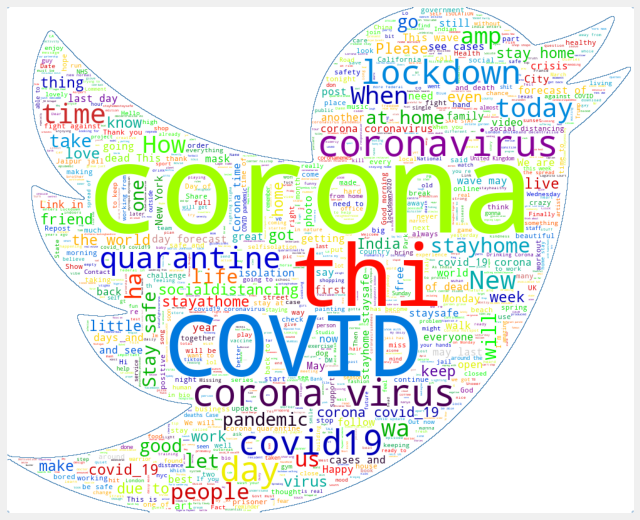

In [12]:
file = os.getcwd()

allWords = ' '.join([twts for twts in df['tweet_text']])

#We read the mask image into a numpy array
twitter_mask = np.array(Image.open(os.path.join(file, "twitter_mask.png")))
#We generate the wordcloud using the series created and the mask 
word_cloud = WordCloud(width=2000, height=1000, max_font_size=200, 
                       background_color="white", max_words=2000, mask=twitter_mask, 
                       contour_width=1, contour_color="steelblue", 
                       colormap="nipy_spectral").generate(allWords)

#Now we plot the figure
plt.figure(figsize=(10,10))
plt.imshow(word_cloud, interpolation="hermite")
plt.axis("off")    
plt.show()   


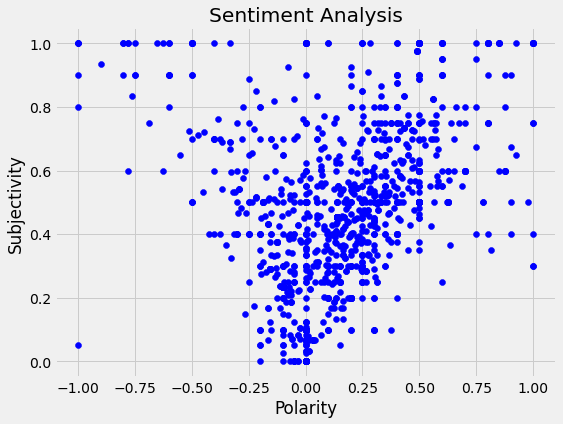

In [13]:
 # Plotting the polarity against subjectivity
plt.figure(figsize=(8,6)) 
for i in df.index:
    plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

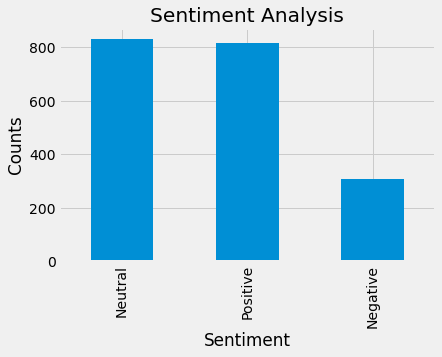

In [14]:
# Plotting the sentiment of the people
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Sentiment'].value_counts().plot(kind = 'bar')
plt.show()

In [96]:
for i in df.location.value_counts().keys():
    print(i)


आज्ञा चक्र
UK
India
London, England
London
Atlanta, GA
Los Angeles, CA
Lagos, Nigeria
New York, NY
New Delhi, India
Nigeria
New York, USA
Corona, CA
Toronto
United Kingdom
Singapore
Nairobi, Kenya
Mumbai
Chicago, IL
Los Angeles
Worldwide
Queens, NY
Americas | United Kingdom
Melbourne, Victoria
Cape Town, South Africa
Bali, Indonesia
Lagos
WORLDWIDE
Thane, Maharashtra
Brooklyn, NY
Washington, DC 20009
Toronto, Ontario
Accra, Ghana
Ahmadabad City, India
Houston, TX
South Africa
City of London
Dallas, TX
Warszawa, Polska
Mumbai, India
Philadelphia, PA
Pune, India
Bedford, Bedfordshire, Uk,
46.869100,103.848242
Istanbul Turkey
mumbai
Kampala, Uganda
Bristol, England
Austin, TX
Ghana
southeastern michigan
NYC
Sydney, New South Wales
Dubai, UAE
भोपाल, भारत
HOSUR
Malaysia
Corona, NY
Johannesburg, South Africa
Nsukka, Nigeria
United States
New York
New Orleans, LA
Tampa, FL
Miramar, FL
Lusaka, Zambia
paris
Palestine, TX
Bengaluru, India
357 Broad St., Bloomfield, NJ
Wildwood, NJ
Wellington, FL

In [97]:
df[df.location == 'Hyderabad, India']

,tweet_id,tweets,tweet_text,Subjectivity,Polarity,Sentiment,location,retweets,response,date
295,1242821447845904390,{'created_at': 'Wed Mar 25 14:31:38 +0000 2020...,Fighting with the covid19 \nAre you?\ncoronavi...,0.0,0.0,Neutral,"Hyderabad, India",0,NaN,2020-03-25
995,1250433154935951360,{'created_at': 'Wed Apr 15 14:37:50 +0000 2020...,Stayhomestaysafe✌️✌️\n fight against corona......,0.0,0.0,Neutral,"Hyderabad, India",0,NaN,2020-04-15


In [98]:
# Storing data in  a csv for further usage.
data = df.to_csv('data.csv')

In [100]:
from collections import Counter
c1 = Counter(df[df.location == 'Mumbai'].Sentiment)

a = 0
for i,j in c1.items():
    if j > a:
        a = j
        sentiment = i
        
print('The Sentiment of Mumbai is '+ sentiment)

The Sentiment of Mumbai is Positive


In [101]:
c2 = Counter(df[df.location == 'Thane, Maharashtra'].Sentiment)
a = 0
for i,j in c2.items():
    if j > a:
        a = j
        sentiment = i
        
print('The Sentiment of Thane, Maharashtra is '+ sentiment)

The Sentiment of Thane, Maharashtra is Positive


In [102]:
c3 = Counter(df[df.location == 'Ahmadabad City, India'].Sentiment)
a = 0
for i,j in c3.items():
    if j > a:
        a = j
        sentiment = i
        
print('The Sentiment of Ahmadabad City, India is '+ sentiment)

The Sentiment of Ahmadabad City, India is Positive


In [103]:
c4 = Counter(df[df.location == 'Pune, India'].Sentiment)
a = 0
for i,j in c4.items():
    if j > a:
        a = j
        sentiment = i
        
print('The Sentiment of Pune, India is '+ sentiment)

The Sentiment of Pune, India is Neutral


In [104]:
c5 = Counter(df[df.location == 'Guwahati, India'].Sentiment)
a = 0
for i,j in c5.items():
    if j > a:
        a = j
        sentiment = i
        
print('The Sentiment of Guwahati, India is '+ sentiment)

The Sentiment of Guwahati, India is Neutral


In [105]:
c6 = Counter(df[df.location == 'Gurgaon, India'].Sentiment)
a = 0
for i,j in c6.items():
    if j > a:
        a = j
        sentiment = i
        
print('The Sentiment of Gurgaon, India is '+ sentiment)

The Sentiment of Gurgaon, India is Positive


In [106]:
c7 = Counter(df[df.location == 'Jaipur, India'].Sentiment)
a = 0
for i,j in c7.items():
    if j > a:
        a = j
        sentiment = i
        
print('The Sentiment of Jaipur, India is '+ sentiment)

The Sentiment of Jaipur, India is Neutral


In [107]:
c8 = Counter(df[df.location == 'Cochin, India'].Sentiment)
a = 0
for i,j in c8.items():
    if j > a:
        a = j
        sentiment = i
        
print('The Sentiment of Jaipur, India is '+ sentiment)

The Sentiment of Jaipur, India is Neutral


In [108]:
c9 = Counter(df[df.location == 'Hyderabad, India'].Sentiment)
a = 0
for i,j in c9.items():
    if j > a:
        a = j
        sentiment = i
        
print('The Sentiment of Jaipur, India is '+ sentiment)

The Sentiment of Jaipur, India is Neutral


In [109]:
c10 = Counter(df[df.location == 'भोपाल, भारत'].Sentiment)
a = 0
for i,j in c10.items():
    if j > a:
        a = j
        sentiment = i
        
print('The Sentiment of भोपाल, भारत is '+ sentiment)

The Sentiment of भोपाल, भारत is Positive
